# Initialization

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import scipy.optimize
import glob
import os
import math
plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'
from astropy.constants import G, M_sun, au

In [18]:
filename_collisions1 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/deienno/10000comets/1*/Collisionsdeienno.dat'
collisions1 = np.genfromtxt(filename_collisions1, dtype='str')

filename_collisions2 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/deienno/10000comets/5*/Collisionsdeienno.dat'
collisions2 = np.genfromtxt(filename_collisions2, dtype='str')
        
filename_collisions3 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/small/deienno/10000comets/2*/Collisionsdeienno.dat'
collisions3 = np.genfromtxt(filename_collisions3, dtype='str')

filename_collisions4 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/small/deienno/10000comets/3*/Collisionsdeienno.dat'
collisions4 = np.genfromtxt(filename_collisions4, dtype='str')

filename_collisions5 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/small/deienno/10000comets/5*/Collisionsdeienno.dat'
collisions5 = np.genfromtxt(filename_collisions5, dtype='str')

filename_collisions6 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/clement/10000comets/1*/Collisionsclement.dat'
collisions6 = np.genfromtxt(filename_collisions6, dtype='str')
        
filename_collisions7 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/clement/10000comets/2*/Collisionsclement.dat'
collisions7 = np.genfromtxt(filename_collisions7, dtype='str')

filename_collisions8 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/clement/10000comets/3*/Collisionsclement.dat'
collisions8 = np.genfromtxt(filename_collisions8, dtype='str')

filename_collisions9 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/small/clement/10000comets/5*/Collisionsclement.dat'
collisions9 = np.genfromtxt(filename_collisions9, dtype='str')
    
filename_collisions10 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/1*/Collisionsnesvorny.dat'
collisions10 = np.genfromtxt(filename_collisions10, dtype='str')

filename_collisions11 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/big/nesvorny/10000comets/4*/Collisionsnesvorny.dat'
collisions11 = np.genfromtxt(filename_collisions11, dtype='str')

filename_collisions12 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/small/nesvorny/10000comets/1*/Collisionsnesvorny.dat'
collisions12 = np.genfromtxt(filename_collisions12, dtype='str')

filename_collisions13 = '/Users/sarahjoiret/Desktop/sims/genga/case2_output/small/nesvorny/10000comets/5*/Collisionsnesvorny.dat'
collisions13 = np.genfromtxt(filename_collisions13, dtype='str')

In [2]:
filename_collisions1 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/1/Collisionsclement.dat'
collisions1 = np.genfromtxt(filename_collisions1, dtype='str')

filename_collisions2 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/2/Collisionsclement.dat'
collisions2 = np.genfromtxt(filename_collisions2, dtype='str')

filename_collisions6 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/6/Collisionsclement.dat'
collisions6 = np.genfromtxt(filename_collisions6, dtype='str')

filename_collisions13 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/13/Collisionsclement.dat'
collisions13 = np.genfromtxt(filename_collisions13, dtype='str')

filename_collisions14 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/14/Collisionsclement.dat'
collisions14 = np.genfromtxt(filename_collisions14, dtype='str')

filename_collisions16 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/16/Collisionsclement.dat'
collisions16 = np.genfromtxt(filename_collisions16, dtype='str')

filename_collisions17 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/17/Collisionsclement.dat'
collisions17 = np.genfromtxt(filename_collisions17, dtype='str')

filename_collisions18 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/18/Collisionsclement.dat'
collisions18 = np.genfromtxt(filename_collisions18, dtype='str')

filename_collisions19 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/19/Collisionsclement.dat'
collisions19 = np.genfromtxt(filename_collisions19, dtype='str')

filename_collisions20 = '/Users/sarahjoiret/Desktop/sims/genga/case1_output/20/Collisionsclement.dat'
collisions20 = np.genfromtxt(filename_collisions20, dtype='str')

In [3]:
class body_proba:
    time:np.ndarray
    p:np.ndarray
    
    def __init__(self, filename: str):
        # Load the data from the Out*.dat file
        data = np.loadtxt(filename)
        if data.shape == (3,):
            self.time = np.asarray([data[0]])
            self.p = np.asarray([data[1]])
            self.mass = np.asarray([data[2]])
            self.flag = False
        else:
            self.time = data[:,0]
            self.p = data[:,1]
            self.mass = data[:,2]
            self.flag = True

In [4]:
# Initialize the body proba list
bodyproba_list1 = []
bodyproba_list2 = []
bodyproba_list6 = []
bodyproba_list13 = []
bodyproba_list14 = []
bodyproba_list16 = []
bodyproba_list17 = []
bodyproba_list18 = []
bodyproba_list19 = []
bodyproba_list20 = []

# Find the directory in which the data are stored and fetch all files from the directory
for filename1 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/1/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename1)
    if proba.flag == True:
        bodyproba_list1.append(proba)

for filename2 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/2/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename2)
    if proba.flag == True:
        bodyproba_list2.append(proba)

for filename6 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/6/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename6)
    if proba.flag == True:
        bodyproba_list6.append(proba)

for filename13 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/13/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename13)
    if proba.flag == True:
        bodyproba_list13.append(proba)

for filename14 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/14/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename14)
    if proba.flag == True:
        bodyproba_list14.append(proba)

for filename16 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/16/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename16)
    if proba.flag == True:
        bodyproba_list16.append(proba)

for filename17 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/17/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename17)
    if proba.flag == True:
        bodyproba_list17.append(proba)

for filename18 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/18/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename18)
    if proba.flag == True:
        bodyproba_list18.append(proba)

for filename19 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/19/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename19)
    if proba.flag == True:
        bodyproba_list19.append(proba)
        
for filename20 in glob.glob('/Users/sarahjoiret/Desktop/sims/genga/case1_output/20/collision_proba/*.dat', recursive=True):
    proba = body_proba(filename20)
    if proba.flag == True:
        bodyproba_list20.append(proba)

In [5]:
#collisions = [collisions1, collisions2, collisions3, collisions4, collisions5, collisions6, collisions7, collisions8, collisions9, collisions10, collisions11, collisions12, collisions13]
collisions = [collisions1, collisions2, collisions6, collisions13, collisions14, collisions16, collisions17, collisions18, collisions19, collisions20]
nb_coll = len(collisions)

probalist = [bodyproba_list1, bodyproba_list2, bodyproba_list6, bodyproba_list13, bodyproba_list14, bodyproba_list16, bodyproba_list17, bodyproba_list18, bodyproba_list19, bodyproba_list20]
nb_proba = len(probalist)

In [94]:
collisions_Mars = [collisions2, collisions13, collisions18, collisions19, collisions20]
nb_coll = len(collisions_Mars)

# Values for the last impact time and mass, late accretion mass, etc.

In [26]:
#Earth_idx = [18.0, 21.0, 30.0, 33.0, 34.0, 7.0, 19.0, 13.0, 33.0, 8.0, 6.0, 12.0, 20.0]
#Earth_m = [1.189, 0.464, 1.015, 1.036, 0.534, 0.474, 0.712, 0.596, 1.074, 1.077, 1.173, 1.301, 0.962]
Earth_idx = [10.0, 13.0, 13.0, 7.0, 6.0, 38.0, 36.0, 20.0, 12.0, 27.0] 
Earth_m = [0.9619, 1.1860, 1.3088, 0.9042, 0.9635, 0.9661, 1.1761, 0.6867, 1.2530, 1.0419]
acc_64_mass = 0.63 * 3*1e-6* np.array([0.9619, 1.1860, 1.3088, 0.9042, 0.9635, 0.9661, 1.1761, 0.6867, 1.2530, 1.0419])
acc_64_time = np.zeros(nb_coll)
last_impact_time = np.zeros(nb_coll)
last_impact_mass = np.zeros(nb_coll)
late_acc_mass = np.zeros(nb_coll)
late_ast_mass = np.zeros(nb_coll)
late_com_mass = np.zeros(nb_coll)
as_mass = np.zeros(nb_coll)
small_acc_mass = np.zeros(nb_coll)

for k in range(nb_coll):
    # Collision file in this sim
    coll_file = collisions[k]
    # Earth analog index in this sim
    Earth_ana = Earth_idx[k]
    # Total accreted mass after last giant impact
    acc_mass = 0
    # Total accreted asteroidal mass after last giant impact
    ast_mass = 0
    # Total accreted asteroidal mass
    totast_mass = 0
    # Total accreted mass
    tot_mass = 0
    # Cometary proba file
    proba_file = probalist[k]
    
    time = coll_file[:,0].astype(float)
    idx_i = coll_file[:,1].astype(float)
    idx_j = coll_file[:,13].astype(float)
    mass_i = coll_file[:,2].astype(float)
    mass_j = coll_file[:,14].astype(float)
    
    impacts_time = []
    impacts_idx = []
    impacts_mass = []
    asimpacts_time = []
    asimpacts_idx = []
    asimpacts_mass = []
    large_time = []
    large_idx = []
    large_mass = []
    small_time = []
    small_idx = []
    small_mass = []
    time_64 = []
    
    for i in range(len(idx_i)):
        # 64 % of the final mass     
        if idx_i[i] == Earth_ana and mass_i[i] >= acc_64_mass[k]:
            time_64.append(time[i])
            
       # if collisions with the Earth analog
        if idx_i[i] == Earth_ana: #and idx_j[i]>=2040:
            impacts_time.append(time[i])
            impacts_idx.append(idx_j[i])
            impacts_mass.append(mass_j[i])
        if idx_i[i] == Earth_ana and idx_j[i]>=2040:
            asimpacts_time.append(time[i])
            asimpacts_idx.append(idx_j[i])
            asimpacts_mass.append(mass_j[i])
        if idx_i[i] == Earth_ana and mass_j[i] >= 1.5e-7: # 1.5e-7 solar masses = 0.05 earth masses
            large_time.append(time[i])
            large_idx.append(idx_j[i])
            large_mass.append(mass_j[i])
        if idx_i[i] == Earth_ana and mass_j[i] < 4e-10: # 3.75e-10 solar masses = 1.25e-4 earth masses
            small_time.append(time[i])
            small_idx.append(idx_j[i])
            small_mass.append(mass_j[i])
            
    # Calculate 64% of the final Earth analog mass)
    acc_64_time[k] = time_64[0]/1e6 # conversion in Myr
    
    # Calculate the time and mass of last giant impact
    last_impact_time[k] = large_time[-1]  /1e6 # conversion in Myr
    last_impact_mass[k] = large_mass[-1] /3e-6 # conversion from solar masses to earth masses
    
    # Calculate the mass accreted after the last giant impact
    for i in range(len(impacts_time)):
        last_impact_t = large_time[-1]
        if impacts_time[i] > last_impact_t:
            acc_mass += impacts_mass[i]
    late_acc_mass[k] = acc_mass /3e-6 # conversion from solar masses to earth masses
    
    # Calculate the asteroidal mass accreted after the last giant impact
    for i in range(len(asimpacts_time)):
        last_impact_t = large_time[-1]
        if asimpacts_time[i] > last_impact_t:
            ast_mass += asimpacts_mass[i]
    late_ast_mass[k] = ast_mass /3e-6 # conversion from solar masses to earth masses
    
    # Calculate the total asteroidal mass accreted among the small impactors 
    for i in range(len(asimpacts_time)):
        totast_mass += asimpacts_mass[i]
    as_mass[k] = totast_mass /3e-6 # conversion from solar masses to earth masses
    
    # Calculate the total mass accreted among the small impactors 
    for i in range(len(small_time)):
        tot_mass += small_mass[i]
    small_acc_mass[k] = tot_mass /3e-6 # conversion from solar masses to earth masses


    # Calculate the cometary mass accreted after the last giant impact
    p_sum = np.zeros(4567) # or 4566
    timestep = 21902.80629705681 # in years
    for i, body in enumerate(proba_file):
        com_proba = body.p * 1.5e22 * timestep / 1e6  # proba per timestep instead of per Myr
                                                 # each comet has a mass of 1.5 x 10e22 kg
        # sum of all the probabilities (of each embryos) for each timestep
        for t in range(len(body.time)): 
            if body.time[t] >= large_time[-1]: # from the time of the last giant impact
                p_sum[t] = p_sum[t] + com_proba[t]
    
    # Calculate the cumulative cometary mass accreted after the last giant impact
    cumsum = np.zeros(4567)
    for t in range(len(cumsum)-1):  # - 1 because we calculate t + 1
        # Change the NaN values in 0
        if math.isnan(p_sum[t+1]) == True:
            p_sum[t+1] = 0.0  
        cumsum[0] = p_sum[0]
        cumsum[t+1] = cumsum[t] + p_sum[t+1]
    late_com_mass[k] = cumsum[-1] / 5.972e+24 # conversion from kg to earth masses

print(acc_64_mass)
print(acc_64_time)
print(last_impact_time)  # in Myr
print(last_impact_mass) # in earth masses
#print(late_acc_mass)  # in earth masses
#print(late_acc_mass/Earth_m)  # in earth analog masses
#print(late_ast_mass)  # in earth masses
#print(late_ast_mass/late_acc_mass)  # proportion
print(as_mass/small_acc_mass)  # proportion
print(as_mass)
print(small_acc_mass)
print(late_com_mass) # in earth masses
print(late_com_mass*100/late_acc_mass) # % of the late veneer mass

[1.817991e-06 2.241540e-06 2.473632e-06 1.708938e-06 1.821015e-06
 1.825929e-06 2.222829e-06 1.297863e-06 2.368170e-06 1.969191e-06]
[ 2.18157951  7.23028173  8.57710855 16.78857744 10.65992412 96.48111573
  2.80379226 10.8027873   4.26519478  6.82179579]
[ 4.30994946 49.75777541 40.79537002 16.71188166 39.03414748 95.71392843
 45.55667949 10.69494421 73.06577638 13.19619184]
[0.06711368 0.07024232 0.27446172 0.34545491 0.13422737 0.47855597
 0.13635484 0.26732843 0.07086805 0.06823999]
[0.26366559 0.2519084  0.25182482 0.26696833 0.24409449 0.19285714
 0.23056995 0.24352332 0.23129252 0.28125   ]
[0.01026192 0.01238939 0.00863503 0.00738358 0.00775901 0.00337893
 0.01113794 0.00588183 0.01276483 0.0135157 ]
[0.03892022 0.04918214 0.03428984 0.02765713 0.03178693 0.01752035
 0.04830612 0.02415306 0.05518912 0.04805583]
[5.84855436e-04 3.20409568e-08 3.04079191e-08 3.28871689e-04
 1.32278896e-04 0.00000000e+00 1.86705857e-07 6.22150567e-06
 3.09667620e-06 6.60703132e-07]
[2.74906339e+00

In [99]:
Mars_idx = [22.0, 8.0, 22.0, 33.0, 33.0] 
Mars_m = [0.067, 0.068, 0.069, 0.140, 0.271]
as_mass = np.zeros(nb_coll)
small_acc_mass = np.zeros(nb_coll)

for k in range(nb_coll):
    # Collision file in this sim
    coll_file = collisions_Mars[k]
    # Earth analog index in this sim
    Mars_ana = Mars_idx[k]
    
    # Total accreted asteroidal mass
    totast_mass = 0
    # Total accreted mass
    tot_mass = 0
    
    time = coll_file[:,0].astype(float)
    idx_i = coll_file[:,1].astype(float)
    idx_j = coll_file[:,13].astype(float)
    mass_i = coll_file[:,2].astype(float)
    mass_j = coll_file[:,14].astype(float)
    
    impacts_time = []
    impacts_idx = []
    impacts_mass = []
    asimpacts_time = []
    asimpacts_idx = []
    asimpacts_mass = []
    large_time = []
    large_idx = []
    large_mass = []
    small_time = []
    small_idx = []
    small_mass = []
    
    for i in range(len(idx_i)):
       # if collisions with the Earth analog
        if idx_i[i] == Earth_ana: #and idx_j[i]>=2040:
            impacts_time.append(time[i])
            impacts_idx.append(idx_j[i])
            impacts_mass.append(mass_j[i])
        if idx_i[i] == Mars_ana and idx_j[i]>=2040:
            asimpacts_time.append(time[i])
            asimpacts_idx.append(idx_j[i])
            asimpacts_mass.append(mass_j[i])
        if idx_i[i] == Mars_ana and mass_j[i] >= 1.5e-7: # 1.5e-7 solar masses = 0.05 earth masses
            large_time.append(time[i])
            large_idx.append(idx_j[i])
            large_mass.append(mass_j[i])
        if idx_i[i] == Mars_ana and mass_j[i] < 4e-10: # 3.75e-10 solar masses = 1.25e-4 earth masses
            small_time.append(time[i])
            small_idx.append(idx_j[i])
            small_mass.append(mass_j[i])

    # Calculate the total asteroidal mass accreted among the small impactors 
    for i in range(len(asimpacts_time)):
        totast_mass += asimpacts_mass[i]
    as_mass[k] = totast_mass /(Mars_m[k] *3e-6) # conversion from solar masses to mars analog masses
    
    # Calculate the total mass accreted among the small impactors 
    for i in range(len(small_time)):
        tot_mass += small_mass[i]
    small_acc_mass[k] = tot_mass /(Mars_m[k] *3e-6) # conversion from solar masses to earth masses

prop = as_mass/small_acc_mass
mean_prop = np.mean(prop)
var = (1/len(prop))*np.sum((prop-mean_prop)**2)
std_dev = np.sqrt(var)
print(prop)  # proportion of CC to the small accreted mass
print(mean_prop, std_dev)

mean_as = np.mean(as_mass)
var_as = (1/len(as_mass))*np.sum((as_mass-mean_as)**2)
std_dev_as = np.sqrt(var_as)
print(as_mass)  # in Mars analog mass
print(mean_as, std_dev_as)

[0.25       0.46875    0.17073171 0.30263158 0.27777778]
0.29397821280844394 0.09798601610077534
[0.01120705 0.0276056  0.01269591 0.0205596  0.00923582]
0.01626079626812072 0.006852493458463419


# Plots

<IPython.core.display.Javascript object>


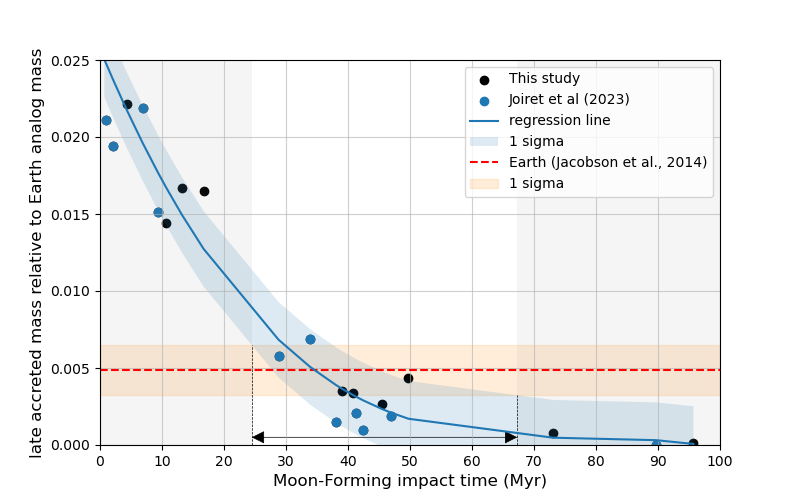

In [56]:
# ---------------------------------------------
# Late Veneer Mass wrt Moon-Forming Impact time
# ---------------------------------------------
from matplotlib.patches import FancyArrowPatch
# Sort last impact time and the corresponding late acc mass according to the last impact time (x)
x_Joiret = np.array([6.9, 2.1, 33.9, 28.8, 46.9, 41.3, 0.9, 9.4, 89.7, 0.7, 38.1, 42.4])
y_Joiret = np.array([0.0219, 0.0194, 0.0069, 0.0058, 0.0019, 0.0021, 0.0211, 0.0151, 0.0, 0.0316, 0.0015, 0.001])
x_ns = last_impact_time
y_ns = late_acc_mass/Earth_m
x_ns = np.append(x_ns, x_Joiret)
y_ns = np.append(y_ns, y_Joiret)
idx = np.lexsort((y_ns,x_ns))
x = np.array([x_ns[i] for i in idx])
y = np.array([y_ns[i] for i in idx])
x100 = np.arange(0,101,1)
x10000 = np.arange(0,100.01,0.01)
# Create the figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(0,100)
ax.set_ylim(0,0.025)
ax.set_xticks(np.arange(0,110,10))
ax.set_xlabel('Moon-Forming impact time (Myr)', fontsize=12)
ax.set_ylabel('late accreted mass relative to Earth analog mass', fontsize=12)    # ($M_{\oplus}$)', fontsize=12)
constraint = 0.00486
c_up = 0.00486 + 0.00163
c_down = 0.00486 - 0.00163
ax.axhline(y=constraint, c='red', linestyle='--', label = 'Earth (Jacobson et al., 2014)')
#plt.axvspan(30.85, 60.4, facecolor='gray', alpha=0.08)
plt.axvspan(0, 24.485, facecolor='gray', alpha=0.08)
plt.axvspan(67.296, 100, facecolor='gray', alpha=0.08)
ax.fill_between(x100, c_up, c_down, color = 'darkorange', alpha=0.15, label='1 sigma')
ax.scatter(x, y, c ='black', label ="This study")
ax.scatter(x_Joiret, y_Joiret, c ='C0', label ="Joiret et al (2023)")
# fit a linear curve and estimate its y-values and their error.
coeff = np.polyfit(x,y,deg=3)
y_regression = coeff[0] * x**3 + coeff[1] * x**2 + coeff[2] * x + coeff[3]
ax.plot(x, y_regression, label='regression line') #y_regression
var = (1/len(x))*np.sum((y-y_regression)**2)
std_dev = np.sqrt(var) # /np.sqrt(len(x)) if I want to represent the standart error
y_up = y_regression + std_dev
y_down = y_regression - std_dev
ax.fill_between(x, y_up, y_down, alpha=0.15, label='1 sigma')
#ax.legend()
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [3,4,1,5,0,2]
#order = [3,1,4,0,2]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.grid(b=True, which='major', alpha=0.6)
plt.vlines(x=24.485, ymin=0.0, ymax=c_up, color = 'black', linewidth = 0.5, linestyle ='--')
plt.vlines(x=67.296, ymin=0.0, ymax=c_down, color = 'black', linewidth = 0.5, linestyle ='--')
myArrow = FancyArrowPatch(posA=(24.485, 0.0005), posB=(67.296, 0.0005), arrowstyle='<|-|>', color='black', mutation_scale=20, shrinkA=0, shrinkB=0, linewidth = 0.5)
ax.add_artist(myArrow)
plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/MFI_time.pdf', dpi=300)
#print(coeff[0], coeff[1], coeff[2])
#print(std_dev)

<IPython.core.display.Javascript object>


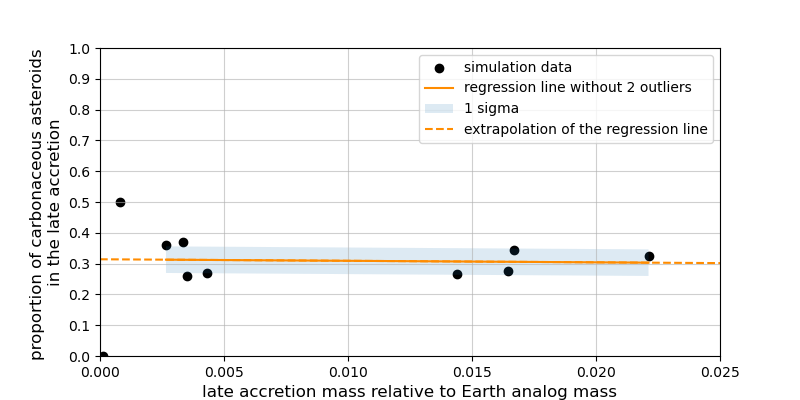

0.3140667909238539
0.04319061687903428


In [65]:
# ----------------------------------------------
# Late Veneer Asteroid Mass wrt Late Veneer mass
# ----------------------------------------------
x_ns = late_acc_mass/Earth_m
y_ns = late_ast_mass/late_acc_mass
idx = np.lexsort((y_ns,x_ns))
x = np.array([x_ns[i] for i in idx])
y = np.array([y_ns[i] for i in idx])
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0,0.025)
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xlabel('late accretion mass relative to Earth analog mass', fontsize=12)
ax.set_ylabel('proportion of carbonaceous asteroids \nin the late accretion', fontsize=12)
ax.scatter(x, y, color = 'black', label = 'simulation data')
# fit a linear curve and estimate its y-values and their error.
coeff = np.polyfit(x[2:10],y[2:10],deg=1)
y_regression = coeff[0] * x[2:10] + coeff[1] 
ax.plot(x[2:10], y_regression, label='regression line without 2 outliers', c ='darkorange')
var = (1/len(x[2:10]))*np.sum((y[2:10]-y_regression)**2)
std_dev = np.sqrt(var) # /np.sqrt(len(x)) if I want to represent the standart error
y_up = y_regression + std_dev
y_down = y_regression - std_dev
ax.fill_between(x[2:10], y_up, y_down, alpha=0.15, label='1 sigma')
# Extrapolation of the regression
xx = np.linspace(0, 0.025, 1000)
f_extrapolated = coeff[0]*xx +coeff[1]
ax.plot(xx,f_extrapolated, linestyle = '--', label='extrapolation of the regression line', c='darkorange')
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,0,3,1]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.grid(b=True, which='major', alpha=0.6)
plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/carb_LV.pdf', dpi=300)
print(coeff[1])
print(std_dev)

In [66]:
# ----------------------------------------------
# Asteroid Mass wrt mass
# ----------------------------------------------
x_ns = np.array([0.9619, 1.1860, 1.3088, 0.9042, 0.9635, 0.9661, 1.1761, 0.6867, 1.2530, 1.0419])
y_ns = as_mass/small_acc_mass
idx = np.lexsort((y_ns,x_ns))
x = np.array([x_ns[i] for i in idx])
y = np.array([y_ns[i] for i in idx])
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(0.65,1.35)
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xlabel('Earth analog mass ($M_{\oplus}$)', fontsize=12)
ax.set_ylabel('proportion of carbonaceous asteroids \nwrt total small impactors', fontsize=12)
ax.scatter(x, y, color = 'black', label = 'simulation data')
# fit a linear curve and estimate its y-values and their error.
coeff = np.polyfit(x,y,deg=1)
y_regression = coeff[0] * x + coeff[1] 
ax.plot(x, y_regression, label='regression line', c ='darkorange')
var = (1/len(x))*np.sum((y-y_regression)**2)
std_dev = np.sqrt(var) # /np.sqrt(len(x)) if I want to represent the standart error
y_up = y_regression + std_dev
y_down = y_regression - std_dev
ax.fill_between(x, y_up, y_down, alpha=0.15, label='1 sigma')
# Extrapolation of the regression
xx = np.linspace(0.65, 1.35, 1000)
f_extrapolated = coeff[0]*xx +coeff[1]
ax.plot(xx,f_extrapolated, linestyle = '--', label='extrapolation of the regression line', c='darkorange')
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,0,3,1]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.grid(b=True, which='major', alpha=0.6)
plt.savefig('/Users/sarahjoiret/Desktop/sims/genga/case1_output/carb.pdf', dpi=300)
print(coeff[1])
print(std_dev)

<IPython.core.display.Javascript object>

0.25239053814051293
0.023104942890803264
